In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt

In [43]:
#1(a)
scores = pd.read_csv("CFB2019_scores.csv", header = None)
scores.columns = ['Team_A_index','Team_A_points',
                'Team_B_index', 'Team_B_points']
scores.head(10)

,Team_A_index,Team_A_points,Team_B_index,Team_B_points
0,695,34,141,14
1,392,20,218,24
2,29,38,270,45
3,721,6,531,16
4,769,45,560,22
5,9,19,7,24
6,317,7,31,30
7,464,10,46,41
8,436,3,80,46
9,687,30,85,12


In [44]:
scores['Team_A_index'].nunique()

769

In [51]:
#construct random walk matrix
RW_M = np.zeros((scores['Team_A_index'].nunique(), scores['Team_A_index'].nunique()))
#team rankings
for i in range(0, scores.shape[0]):
    
    j1=scores.iloc[i,:].Team_A_index-1
    j2=scores.iloc[i,:].Team_B_index-1
    points_j1=scores.iloc[i,:].Team_A_points
    points_j2=scores.iloc[i,:].Team_B_points
    #teamA WIN
    if points_j1 > points_j2:
        RW_M[int(j1), int(j1)] += 1+points_j1/(points_j1+points_j2)
        RW_M[int(j2), int(j2)] += points_j2/(points_j1+points_j2)
        RW_M[int(j1), int(j2)] += points_j2/(points_j1+points_j2)
        RW_M[int(j2), int(j1)] += 1+points_j1/(points_j1+points_j2)
    #teamB WIN
    elif points_j1 < points_j2:
        RW_M[int(j1), int(j1)] += points_j1/(points_j1+points_j2)
        RW_M[int(j2), int(j2)] += 1+points_j2/(points_j1+points_j2)
        RW_M[int(j1), int(j2)] += 1+points_j2/(points_j1+points_j2)
        RW_M[int(j2), int(j1)] += points_j1/(points_j1+points_j2)

In [52]:
RW_M

array([[10.74594258,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  8.09443602,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  9.12861765, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 15.56046372,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        14.98976876,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 12.50661548]])

In [48]:
#team name list
team_name = pd.read_csv('TeamNames.txt',sep="\n", header=None)

In [67]:
def rank_top25_team(t):
    M = RW_M/np.sum(RW_M, axis=1).reshape(-1,1)
    w0 = np.ones(RW_M.shape[0])*np.array(1/(RW_M.shape[0])).reshape(1,-1)
    W_t = np.matmul(w0,M)
    for i in range(t-1):
        W_t = np.matmul(W_t,M)
        
    df = pd.DataFrame({'wt':W_t.tolist()[0]}).sort_values(by=['wt'],ascending=False)
    top25 = pd.concat([df, team_name], axis=1, join='inner').head(25)
    top25.columns=['wt','team_name']
    return top25

In [68]:
#t=10
t_10 = rank_top25_team(10)
t_10

,wt,team_name
466,0.012812,NorthCentral
326,0.012578,LSU
436,0.011511,Morningside
744,0.011088,Wheaton
405,0.009633,MinnSt-Mankato
440,0.009507,Muhlenberg
492,0.009241,OhioState
679,0.009165,UW-Whitewater
468,0.009137,NorthDakotaSt
135,0.008941,Clemson


In [69]:
#t=100
t_100 = rank_top25_team(100)
t_100 

,wt,team_name
326,0.043642,LSU
744,0.025822,Wheaton
466,0.024442,NorthCentral
135,0.023704,Clemson
492,0.022688,OhioState
436,0.022621,Morningside
243,0.017165,Georgia
606,0.014990,StJohnsMN
726,0.013367,WestFlorida
5,0.012917,Alabama


**t=1000**

In [70]:
#t=1000
t_1000 = rank_top25_team(1000)
t_1000

,wt,team_name
326,0.084419,LSU
135,0.045527,Clemson
492,0.043452,OhioState
243,0.032720,Georgia
5,0.024679,Alabama
217,0.023696,Florida
501,0.019266,Oregon
39,0.019037,Auburn
495,0.018703,Oklahoma
510,0.017974,PennState


In [71]:
#t=10000
t_10000 = rank_top25_team(10000)
t_10000 

,wt,team_name
326,0.091366,LSU
135,0.049262,Clemson
492,0.047009,OhioState
243,0.035382,Georgia
5,0.026695,Alabama
217,0.025624,Florida
501,0.020779,Oregon
39,0.020582,Auburn
495,0.020202,Oklahoma
510,0.019429,PennState


Text(0, 0.5, 'difference')

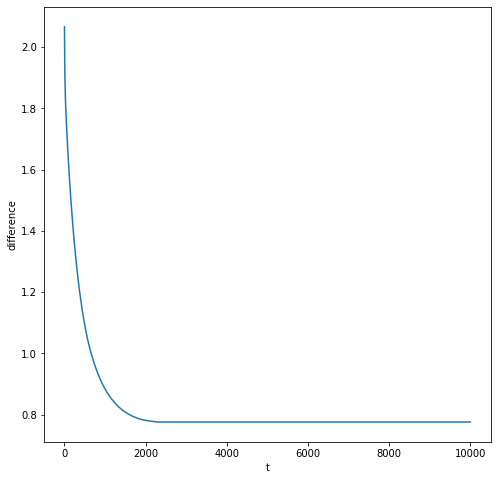

In [78]:
#1(b)
M_transpose = (RW_M/np.sum(RW_M, axis=1).reshape(-1,1)).transpose()
#u1 is the first eigenvecot of M transpose
lambda1, u1 = eigs(M_transpose,k=1)

#w_infinite
W_inf = u1.flatten()/np.sum(u1.flatten())
#normalized random walk matrix
M = RW_M/np.sum(RW_M, axis=1).reshape(-1,1)
#w_0
w0 = np.ones(RW_M.shape[0])*np.array(1/(RW_M.shape[0])).reshape(1,-1)
#w_1
W_t = np.matmul(w0,M)

diff = []
diff.append(np.sum(abs(W_t - W_inf))) 
for i in range(10000-1):
    #w_t
    W_t = np.matmul(W_t,M) 
    diff.append(np.sum(abs(W_t - W_inf)))  
    
#plot    
plt.figure(figsize=(8,8))
plt.plot(np.arange(1,10001), diff)
plt.xlabel('t')
plt.ylabel('difference')


## Problem 2 Nonnegative Matrix Factorization

### a)

Number of vocabulary = 3012; Numer of document = 8447

In [ ]:
nyt = pd.read_csv('nyt_data.txt',sep='\n',header=None)

In [ ]:
nyt.head()

In [ ]:
nyt.shape[0]

In [ ]:
nyt.iloc[0,:].tolist()[0].split(',')[0].split(':')[0]

Construct Matrix X

In [ ]:
X = np.zeros([3012,8447])

In [ ]:
X.shape

In [ ]:
document_index = 0
acc_temp=[]
for i in range(0, nyt.shape[0]):
    #print(document_index)
    row = nyt.iloc[i,:].tolist()[0].split(',')
    for item in row:
        one_word = item.split(':')
        X[int(one_word[0])-1, document_index] = int(one_word[1])
        acc_temp.append(int(one_word[0]))
    document_index += 1

In [ ]:
X

In [ ]:
np.sum(X)

Initialize matrix W and H: each value in W and H can be initialized randomly to a positive number, e.g., from a Uniform(1,2) distribution.

In [ ]:
W = np.random.uniform(1,2,(3012,25))
H = np.random.uniform(1,2,(25,8447))

Implement Matrix Factorization using divergence objective

In [ ]:
purple = X/np.matmul(W,H)

In [ ]:
purple.shape

In [ ]:
W_trans = W.transpose()

In [ ]:
W_norm = W_trans/np.sum(W_trans, axis=1).reshape(-1,1) #normalize rows

In [ ]:
W_norm.shape

In [ ]:
part2 = np.matmul(W_norm, purple)

In [ ]:
part2.shape

In [ ]:
new_H = np.multiply(H, part2)

In [ ]:
new_H.shape

In [ ]:
def NMF(W, H, num_iteration):
    """
    Return W, H, divergence objective funtion after num_iterations.
    
    W: initialized W
    H: initialized H
    num_iteration: number of iterations
    """
    obj_acc = []
    for i in range(0,num_iteration):
        #update H
        purple = X/(np.matmul(W,H)+1e-16)
        W_trans = W.transpose()
        W_norm = W_trans/np.sum(W_trans, axis=1).reshape(-1,1) #normalize rows
        part2 = np.matmul(W_norm, purple)
        new_H = np.multiply(H, part2)
        H = new_H
        #update W
        #recalculate purple
        purple = X/(np.matmul(W,H)+1e-16)
        H_trans = H.transpose()
        H_norm = H_trans/np.sum(H_trans, axis=0) #normalize columns
        middle = np.matmul(purple, H_norm)
        new_W = np.multiply(W, middle)
        W = new_W

        #update objective
        WH = np.matmul(W,H)
        obj = np.sum(np.multiply(np.log(1/(WH+1e-16)),X) + WH)
        obj_acc.append(obj)
    
    return W, H, obj_acc


In [ ]:
init_W = np.random.uniform(1,2,(3012,25))
init_H = np.random.uniform(1,2,(25,8447))
W_NMF, H_NMF, obj_lst = NMF(init_W, init_H,100)

In [ ]:
plt.figure(figsize=(8,6))
x_axis = np.arange(0,100)
plt.plot(x_axis, obj_lst)
plt.title('Divergence Objective of Non-Negative Matrix Factorization after 100 iterations')
plt.xlabel('iterations')
plt.ylabel('divergence objective')

### b)

After running the algorithm, normalize the columns of W so they sum to one. For each column of W, list the 10 words having the largest weight and show the weight. Theith row of W corresponds to the ith word in the “dictionary” provided with the data. Organize these lists in a 5×5 table.

In [ ]:
W_NMF

In [ ]:
W_NMF.shape

Normalize the columns of W

In [ ]:
W_NMF_norm = W_NMF/np.sum(W_NMF, axis=0) #normalize columns

In [ ]:
W_NMF_norm

In [ ]:
word = pd.read_csv('nyt_vocab.dat', header=None)
word_index = np.arange(0, 3012)
dict_word = {'word_index':word_index, 'word':word.iloc[:,0].tolist()}
word = pd.DataFrame(dict_word)
word.columns = ['word_index', 'word']
word.head()

In [ ]:
df_important_word = pd.DataFrame(W_NMF_norm)

In [ ]:
word_index = np.arange(0, 3012)
d = {'word_index':word_index, 'weight':df_important_word.iloc[:,24].tolist()}
df = pd.DataFrame(d)
df =df.sort_values(by='weight', ascending=False).iloc[0:10,:]
df2 = pd.concat([df, word], axis=1, join='inner').head(25)
df2 = df2.drop(columns=['word_index'])

Find most important 10 words for 25 columns

In [ ]:
acc_alltable = []
for i in range(df_important_word.shape[1]):
    word_index = np.arange(0, 3012)
    d = {'word_index':word_index, 'weight':df_important_word.iloc[:,i].tolist()}
    df = pd.DataFrame(d)
    df =df.sort_values(by='weight', ascending=False).iloc[0:10,:]
    df2 = pd.concat([df, word], axis=1, join='inner').head(25)
    df2= df2.drop(columns=['word_index'])
    acc_alltable.append(df2)  

Column 1

In [ ]:
acc_alltable[0]

Column 2

In [ ]:
acc_alltable[1]

In [ ]:
acc_alltable[2]

In [ ]:
acc_alltable[3]

In [ ]:
acc_alltable[4]

In [ ]:
acc_alltable[5]

In [ ]:
acc_alltable[6]

In [ ]:
acc_alltable[7]

In [ ]:
acc_alltable[8]

In [ ]:
acc_alltable[9]

In [ ]:
acc_alltable[10]

In [ ]:
acc_alltable[11]

In [ ]:
acc_alltable[12]

In [ ]:
acc_alltable[13]

In [ ]:
acc_alltable[14]

In [ ]:
acc_alltable[15]

In [ ]:
acc_alltable[16]

In [ ]:
acc_alltable[17]

In [ ]:
acc_alltable[18]

In [ ]:
acc_alltable[19]

In [ ]:
acc_alltable[20]

In [ ]:
acc_alltable[21]

In [ ]:
acc_alltable[22]

In [ ]:
acc_alltable[23]

In [ ]:
acc_alltable[24]